Adding thermal metabolic constraints - from Danica's github

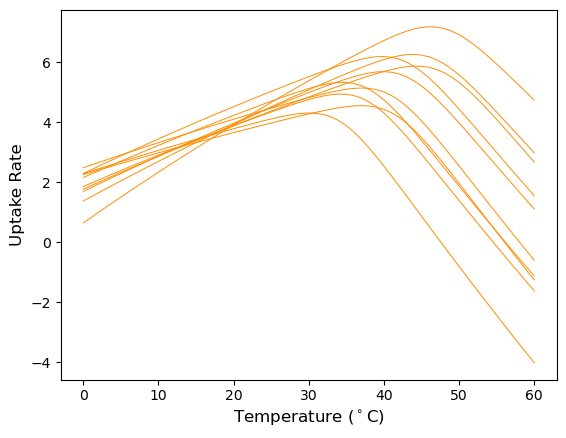

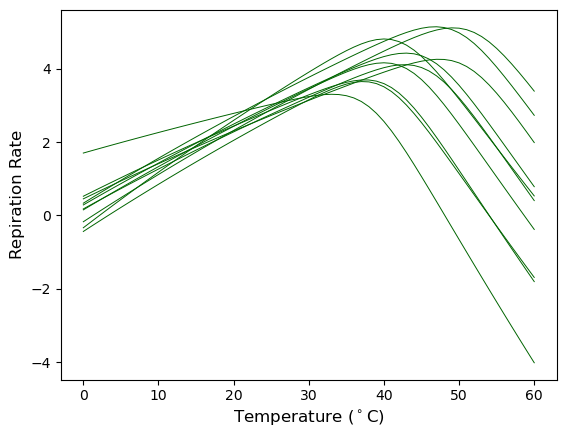

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
k = 0.0000862 # Boltzman constant
Tref = 273.15 + 10 # Reference temperature Kelvin, 0 degrees C
T = 273.15 + np.linspace(0,60,61) # Temperatures
Ea_D = 3.5
lf = 0.4

rho_R = -0.75
rho_U = -0.75


B_R0 = np.log(1.70 * np.exp((-0.67/k) * ((1/Tref)-(1/273.15)))/(1 + (0.67/(Ea_D - 0.67)) * np.exp(Ea_D/k * (1/311.15 - 1/Tref)))) # Using CUE0 = 0.22, mean growth rate = 0.48
B_R0_var = 0.05* B_R0
Ea_R_mean = 0.67; Ea_R_var = 0.04*Ea_R_mean
cov_xy_R = rho_R * B_R0_var**0.5 * Ea_R_var ** 0.5
mean_R = [B_R0, Ea_R_mean]
cov_R = [[B_R0_var, cov_xy_R], [cov_xy_R, Ea_R_var]]  

B_U0 = np.log((1.70/(1 - lf - 0.22)) * np.exp((-0.82/k) * ((1/Tref)-(1/273.15)))/(1 + (0.82/(Ea_D - 0.82)) * np.exp(Ea_D/k * (1/308.15 - 1/Tref)))) 
B_U0_var = 0.05* B_U0
Ea_U_mean = 0.82; Ea_U_var = (0.04*Ea_U_mean)
cov_xy_U = rho_U * B_U0_var**0.5 * Ea_U_var ** 0.5
mean_U = [B_U0, Ea_U_mean]
cov_U = [[B_U0_var, cov_xy_U], [cov_xy_U, Ea_U_var]]  


np.random.seed(0)
T_pk_U = 273.15 + np.random.normal(35, 5, size = N); T_pk_R = T_pk_U + 3
B_R_log, Ea_R = np.random.multivariate_normal(mean_R, cov_R, N).T
B_U_log, Ea_U = np.random.multivariate_normal(mean_U, cov_U, N).T
B_R = np.exp(B_R_log); B_U = np.exp(B_U_log)


for i in range(N):
    U_Sharpe = B_U[i] * np.exp((-Ea_U[i]/k) * ((1/T)-(1/Tref)))/(1 + (Ea_U[i]/(Ea_D - Ea_U[i])) * np.exp(Ea_D/k * (1/T_pk_U[i] - 1/T))) 
    plt.plot(T - 273.15, np.log(U_Sharpe), color = 'darkorange', linewidth=0.7)

plt.xlabel('Temperature ($^\circ$C)', fontsize = 12) 
plt.ylabel('Uptake Rate', fontsize = 12)
plt.show()

for i in range(N):
    R_Sharpe = B_R[i] * np.exp((-Ea_R[i]/k) * ((1/T)-(1/Tref)))/(1 + (Ea_R[i]/(Ea_D - Ea_R[i])) * np.exp(Ea_D/k * (1/T_pk_R[i] - 1/T))) 
    plt.plot(T - 273.15, np.log(R_Sharpe), 'darkgreen', linewidth=0.7)

plt.xlabel('Temperature ($^\circ$C)', fontsize = 12) 
plt.ylabel('Repiration Rate', fontsize = 12)
plt.show()



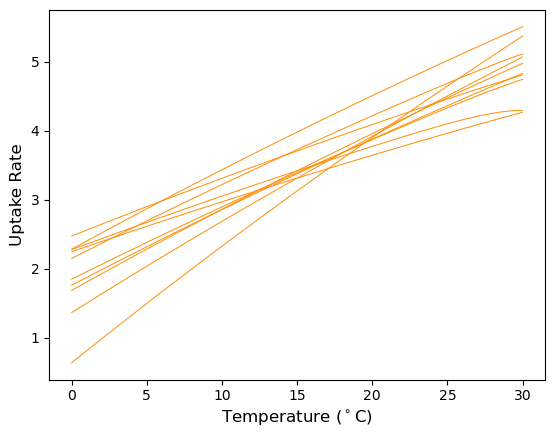

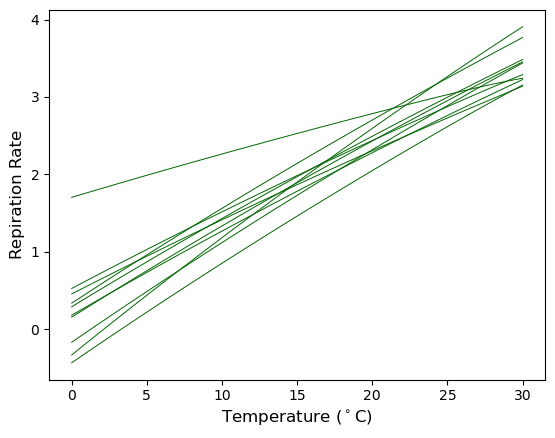

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
k = 0.0000862 # Boltzman constant
Tref = 273.15 + 10 # Reference temperature Kelvin, 0 degrees C
T = 273.15 + np.linspace(0,30,61) # changed temperature to 30 degrees max 
Ea_D = 3.5
lf = 0.4

rho_R = -0.75
rho_U = -0.75


B_R0 = np.log(1.70 * np.exp((-0.67/k) * ((1/Tref)-(1/273.15)))/(1 + (0.67/(Ea_D - 0.67)) * np.exp(Ea_D/k * (1/311.15 - 1/Tref)))) # Using CUE0 = 0.22, mean growth rate = 0.48
B_R0_var = 0.05* B_R0
Ea_R_mean = 0.67; Ea_R_var = 0.04*Ea_R_mean
cov_xy_R = rho_R * B_R0_var**0.5 * Ea_R_var ** 0.5
mean_R = [B_R0, Ea_R_mean]
cov_R = [[B_R0_var, cov_xy_R], [cov_xy_R, Ea_R_var]]  

B_U0 = np.log((1.70/(1 - lf - 0.22)) * np.exp((-0.82/k) * ((1/Tref)-(1/273.15)))/(1 + (0.82/(Ea_D - 0.82)) * np.exp(Ea_D/k * (1/308.15 - 1/Tref)))) 
B_U0_var = 0.05* B_U0
Ea_U_mean = 0.82; Ea_U_var = (0.04*Ea_U_mean)
cov_xy_U = rho_U * B_U0_var**0.5 * Ea_U_var ** 0.5
mean_U = [B_U0, Ea_U_mean]
cov_U = [[B_U0_var, cov_xy_U], [cov_xy_U, Ea_U_var]]  


np.random.seed(0)
T_pk_U = 273.15 + np.random.normal(35, 5, size = N); T_pk_R = T_pk_U + 3
B_R_log, Ea_R = np.random.multivariate_normal(mean_R, cov_R, N).T 
B_U_log, Ea_U = np.random.multivariate_normal(mean_U, cov_U, N).T
B_R = np.exp(B_R_log); B_U = np.exp(B_U_log)


# NOTE: THE EQUATIONS ARE LOGGED! 

for i in range(N):
    U_Sharpe = B_U[i] * np.exp((-Ea_U[i]/k) * ((1/T)-(1/Tref)))/(1 + (Ea_U[i]/(Ea_D - Ea_U[i])) * np.exp(Ea_D/k * (1/T_pk_U[i] - 1/T))) 
    plt.plot(T - 273.15, np.log(U_Sharpe), color = 'darkorange', linewidth=0.7)

plt.xlabel('Temperature ($^\circ$C)', fontsize = 12) 
plt.ylabel('Uptake Rate', fontsize = 12)
plt.show()

for i in range(N):
    R_Sharpe = B_R[i] * np.exp((-Ea_R[i]/k) * ((1/T)-(1/Tref)))/(1 + (Ea_R[i]/(Ea_D - Ea_R[i])) * np.exp(Ea_D/k * (1/T_pk_R[i] - 1/T))) 
    plt.plot(T - 273.15, np.log(R_Sharpe), 'darkgreen', linewidth=0.7)

plt.xlabel('Temperature ($^\circ$C)', fontsize = 12) 
plt.ylabel('Repiration Rate', fontsize = 12)
plt.show()



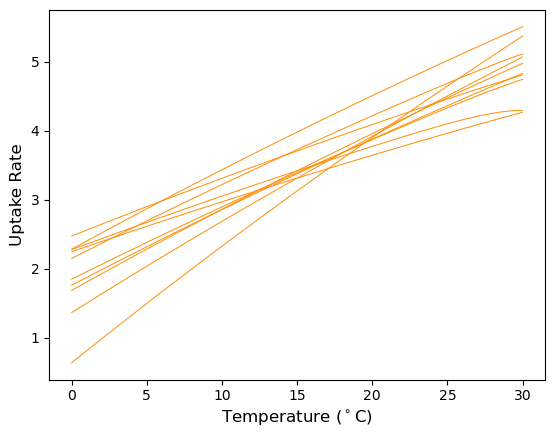

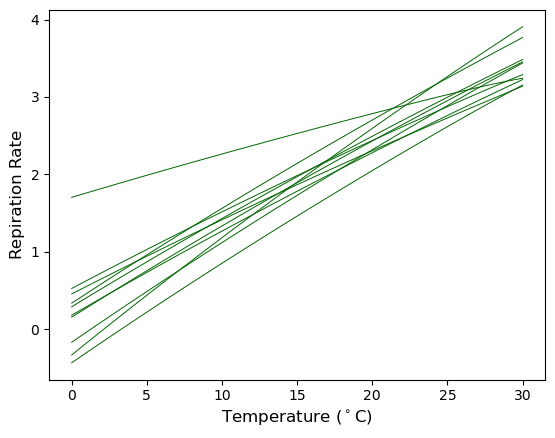

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
k = 0.0000862 # Boltzman constant
Tref = 273.15 + 10 # Reference temperature Kelvin, 0 degrees C
T = 273.15 + np.linspace(0,30,61) # changed temperature to 30 degrees max 
Ea_D = 3.5
lf = 0.4

rho_R = -0.75
rho_U = -0.75


B_R0 = np.log(1.70 * np.exp((-0.67/k) * ((1/Tref)-(1/273.15)))/(1 + (0.67/(Ea_D - 0.67)) * np.exp(Ea_D/k * (1/311.15 - 1/Tref)))) # Using CUE0 = 0.22, mean growth rate = 0.48
B_R0_var = 0.05* B_R0
Ea_R_mean = 0.67; Ea_R_var = 0.04*Ea_R_mean
cov_xy_R = rho_R * B_R0_var**0.5 * Ea_R_var ** 0.5
mean_R = [B_R0, Ea_R_mean]
cov_R = [[B_R0_var, cov_xy_R], [cov_xy_R, Ea_R_var]]  

B_U0 = np.log((1.70/(1 - lf - 0.22)) * np.exp((-0.82/k) * ((1/Tref)-(1/273.15)))/(1 + (0.82/(Ea_D - 0.82)) * np.exp(Ea_D/k * (1/308.15 - 1/Tref)))) 
B_U0_var = 0.05* B_U0
Ea_U_mean = 0.82; Ea_U_var = (0.04*Ea_U_mean)
cov_xy_U = rho_U * B_U0_var**0.5 * Ea_U_var ** 0.5
mean_U = [B_U0, Ea_U_mean]
cov_U = [[B_U0_var, cov_xy_U], [cov_xy_U, Ea_U_var]]  


np.random.seed(0)
T_pk_U = 273.15 + np.random.normal(35, 5, size = N); T_pk_R = T_pk_U + 3
B_R_log, Ea_R = np.random.multivariate_normal(mean_R, cov_R, N).T 
B_U_log, Ea_U = np.random.multivariate_normal(mean_U, cov_U, N).T
B_R = np.exp(B_R_log); B_U = np.exp(B_U_log)


# NOTE: THE EQUATIONS ARE LOGGED! 

for i in range(N):
    U_Sharpe = B_U[i] * np.exp((-Ea_U[i]/k) * ((1/T)-(1/Tref)))/(1 + (Ea_U[i]/(Ea_D - Ea_U[i])) * np.exp(Ea_D/k * (1/T_pk_U[i] - 1/T))) 
    plt.plot(T - 273.15, np.log(U_Sharpe), color = 'darkorange', linewidth=0.7)

plt.xlabel('Temperature ($^\circ$C)', fontsize = 12) 
plt.ylabel('Uptake Rate', fontsize = 12)
plt.show()

for i in range(N):
    R_Sharpe = B_R[i] * np.exp((-Ea_R[i]/k) * ((1/T)-(1/Tref)))/(1 + (Ea_R[i]/(Ea_D - Ea_R[i])) * np.exp(Ea_D/k * (1/T_pk_R[i] - 1/T))) 
    plt.plot(T - 273.15, np.log(R_Sharpe), 'darkgreen', linewidth=0.7)

plt.xlabel('Temperature ($^\circ$C)', fontsize = 12) 
plt.ylabel('Repiration Rate', fontsize = 12)
plt.show()



New test below (following published github)
I think this one starts from scratch in terms of building the MiCRM and EGLV models, then incorporating temperature.
so see this as a standalone thing (ignore the previous code in MiCRM_EGLV_no_temp.ipynb for now)

In [5]:
# from github temp.jl, converted to python

# this section is about incorporating temperature dependence 


import numpy as np
from numpy.random import default_rng
from scipy.stats import multivariate_normal

rng = default_rng(111) # random number generator 


# note that the u(T) and m(T) equation have the same structure, except the parameters are different. 
# both of the equations involve parameters like:
# B0 (base rate), E (activation energy), k (Boltzmann constant), Ed (deactivation energy), Tp (peak performance temperature), and Tr (reference temperature) 
# first, we want to generate random parameters for each consumer (as mentioned above), like B, E, Tp
# and for each of these temp-dependent parameters, we want to generate one for uptake u(T) and one for respiration m(T) 
# they're not actually fully random, as we do define mean and variance for teh parameters, and draw from a multivariate normal distribution 



def randtemp_param(N, kw):
    """
    Generate random temperature-dependent trait parameters for consumers.
    
    Returns:
        B: base rates (N x 2)
        E: activation energies (N x 2)
        Tp: peak temperatures (N x 2)
    """
    L = kw['L'] # leakage 
    rho_t = kw['rho_t']

    L_v = np.mean(L)
    B0_m = -1.4954 # I think this is mortality / respiration rate 
    B0_CUE = 0.1953 
    B0_u = np.log(np.exp(B0_m) / (1 - L_v - B0_CUE)) # I think this is uptake rate. dependent on carbon use efficiency (CUE) and leakage rate
    
    B0 = np.array([B0_u, B0_m]) # B0 is a vector of base rates for uptake and respiration
    B0_var = 0.17 * np.abs(B0) # variance of base rates, 0.17 is a scaling factor
    E_mean = np.array([0.8146, 0.5741]) # mean activation energies for uptake and respiration
    E_var = 0.1364 * E_mean # variance of activation energies, 0.1364 is a scaling factor
    cov_xy = rho_t * np.sqrt(B0_var * E_var) # covariance between base rates and activation energies, rho_t is the correlation coefficient

    cov_u = np.array([[B0_var[0], cov_xy[0]], [cov_xy[0], E_var[0]]]) # covariance matrix for uptake
    cov_m = np.array([[B0_var[1], cov_xy[1]], [cov_xy[1], E_var[1]]]) # covariance matrix for respiration

    allu = multivariate_normal.rvs(mean=[B0[0], E_mean[0]], cov=cov_u, size=N).T # draw random samples from multivariate normal distribution for uptake
    allm = multivariate_normal.rvs(mean=[B0[1], E_mean[1]], cov=cov_m, size=N).T # draw random samples from multivariate normal distribution for respiration

    B = np.column_stack((np.exp(allu[0]), np.exp(allm[0]))) # exponentiate the base rates to get the actual values
    E = np.column_stack((allu[1], allm[1])) # activation energies are already in the correct form

    Tpu = 273.15 + rng.normal(35, 5, N) # draw random peak temperatures for uptake from a normal distribution with mean 35 and std 5
    Tpm = Tpu + 3 # peak temperature for respiration is 3 degrees higher than for uptake
    Tp = np.column_stack((Tpu, Tpm)) # combine the peak temperatures into a single array 

    return B, E, Tp


# randtemp_param_test = randtemp_param(3, {'L': 0.4, 'rho_t': -0.75}) 
# print(randtemp_param_test) 
# this works - produces 2D arrays 


# now we have generated parameters (generating B, E, Tp) for each consumer 
# we did this by drawing from a multivariate normal distribution, with some constraints like mean, variance, correlation that we defined 
# now that the parameters are generated, we can incorporate them into the Arrhenius equation to calculate the temperature-dependent trait values 
# since uptake u(T) and respiration m(T) both depend on these parameters like B, E, Tp (which we have now defined) 




def temp_trait(N, kw):
    """
    Compute temperature-dependent trait scaling based on an Arrhenius-like thermal performance curve.
    
    Arguments:
        N: number of consumers
        kw: dict containing temperature parameters (T, Tr, Ed, L, rho_t)

    Returns:
        temp_p: temperature-scaled trait values (vector of size N)
        B, E: base rates and activation energies (N x 2)
        Tp: peak temperatures for uptake and respiration (N x 2)
    """
    k = 0.0000862  # Boltzmann constant. used in exponential term of the Arrhenius equation
    T = kw['T']
    Tr = kw['Tr'] 
    Ed = kw['Ed']

    B, E, Tp = randtemp_param(N, kw) # draw random base rates (B), activation energies (E), and peak temperatures (Tp) for each consumer. 
    # we are using the previously defined function to generate these parameters  

    # Arrhenius function with high-temp deactivation

    # uptake rate u(T)
    temp_p_u = B[:, 0] * np.exp((-E[:, 0] / k) * ((1 / T) - (1 / Tr))) / \
              (1 + (E[:, 0] / (Ed - E[:, 0])) * np.exp(Ed / k * (1 / Tp[:, 0] - 1 / T)))
    
    # respiration rate m(T) 
    temp_p_m = B[:, 1] * np.exp((-E[:, 1] / k) * ((1 / T) - (1 / Tr))) / \
              (1 + (E[:, 1] / (Ed - E[:, 1])) * np.exp(Ed / k * (1 / Tp[:, 1] - 1 / T)))

    temp_p = np.column_stack((temp_p_u, temp_p_m))  # shape (N,2)
    
    return temp_p, B, E, Tp


# temp_trait_test = temp_trait(3, {'T': 273.15 + 10, 'Tr': 273.15 + 10, 'Ed': 3.5, 'L': 0.4, 'rho_t': -0.75})
# print(temp_trait_test)


# this temp_trait function uses the previous randtemp_param function to generate parameters for TPC, which are B, E, Tp 
# and then it uses these parameters to calculate the temperature-dependent trait values (u and m, which are uptake and respiration)  
# it does this by putting these parameters into the Arrhenius-like TPC equations u(T) and m(T) 
# the inputs are N (number of consumers) and kw (a dictionary of parameters like T, Tr, Ed, L, rho_t)
# and the outputs are the temp_p (temperature-scaled trait values), B (base rates), E (activation energies), and Tp (peak temperatures)
# we could define some temperature T, and the temp_p functions would calculate the resulting u and m for that temperature 
# so using this, we can compare e.g. low vs high temperatures by defining different T values 
# and potentially make continuous graphs of temperature vs growth rate or something, and use that to inform timescale separation / GLV accuracy 




In [6]:
# from github micrm_params.jl, converted to python 

# in the previous block of code, we generated temperature-dependent parameters
# but those parameters were just for the TPC 
# we also need to produce the other parameters for MiCRM 
# so this block of code focuses on defining parameters for MiCRM 
# and we later use these parameters to run simulations etc 


# kw is a dictionary carrying all the model inputs and intermediate results (temp, TPC scaling, leakage scalar, etc) 
# we like to include it (like in def_m) even though it's not needed for the default version
# so that any generator function can just pull out what it needs from kw 

import numpy as np

# Default parameter-generating functions
def def_m(N, M, kw):
    # Respiration (mortality) rates: ones vector of length N.
    return np.ones(N)

def def_rho(N, M, kw):
    # Resource-specific supply rates: ones vector of length M.
    # this was originally resource loss rate, but i changed it to supply so it makes sense with the equation 
    return np.ones(M)

def def_omega(N, M, kw):
    # Resource loss rates: ones vector of length M.
    return np.ones(M)


# the above code for def_m and def_rho are just returning vectors of ones, length N for respiration (m) and length M for supply (rho). 
# these are like the 'default' respiration/mortality rates, and default resource supply rates. def = default 
# depends on number of consumers N and number of resources M 
# later we can add temperature dependence, using functions we defined in previous section of code 



def def_u(N, M, kw):
    # Uptake matrix: each of N rows is drawn from a symmetric Dirichlet of dimension M.
    # this establishes the structure of the uptake function - it's a matrix of N x M 
    # unlike others like respiration (m) which is just a vector of length N 
    # numpy.random.dirichlet uses concentration parameters of length M
    return np.random.dirichlet(alpha=np.ones(M), size=N)


# the 'u' is an N x M matrix. each of the rows are sampled from a Dirichlet distribution. 
# each consumer is a row, and each resource is a column. 
# each consumer's uptake across resources (sum of a row) is 1. but this is randomly allocated among M resources. 
# so i guess the uptake is not absolute units but it's relative to other resources? 
# also i think this describes uptake preference (so how much of a certain resource it uptakes vs another one, relatively), not uptake rate which can be temp-dependent (as previously defined) 


def def_l(N, M, L):
    # Leakage-transformation tensor: shape (N, M, M). For each consumer i and resource alpha,
    # draw an M-vector from Dirichlet and scale by L[i].
    l = np.zeros((N, M, M))
    phi = np.ones(M)
    for i in range(N):
        for alpha in range(M):
            draw = np.random.dirichlet(alpha=phi)
            l[i, alpha, :] = draw * L[i]
    return l

# again, i think leakage is relative units (arbitrary units or sth)
# more about the 'preference' in terms of which resources are leaked 


# this is the N x M x M leakage tensor. for each consumer i and resource index alpha, we are drawing an M-vector from a Dirichlet distribution, and scaling it by L[i].
# this is the leakage matrix for each consumer-resource pair. 
# from the paper: 
# L encodes each strain's metabolic network. L is the leakage-transformation tensor. L determines how consumed substrates are leaked / metabolically transformed 
# so i think for each strain N + each resource M, there is a whole vector (length M) of what resources that this one coudl be leaked as or transformed into. 

# these previous functions are 'default' functions for generating parameters
# they create simple placeholder values like vectors of 1s, or random Dirichlet distributions 
# these functions can be overridden (e.g. after we add temp dependence)

# next, in generate_params, we will add temperature dependence to the parameters 

def generate_params(N,
                     M,
                     f_m=def_m,
                     f_rho=def_rho,
                     f_omega=def_omega,
                     f_u=def_u,
                     f_l=def_l,
                     **kwargs):
    
    # f_m = def_m means that if we don't provide a function for f_m, it will use the default one (def_m)
    # this is why we had to define the default functions earlier 
    # **kwargs is any other keyword arguments (not directly specified as function inputs here, but bundled together in dictionary)
    
    """
    Generate temperature-dependent MiCRM parameters.

    Parameters:
        N, M       : integers, number of consumers and resources
        f_m, f_rho, f_omega, f_u, f_l : functions to generate m, rho, omega, u, l
        kwargs     : other keyword arguments (e.g., T, rho_t, Tr, Ed, L)

    Returns:
        params : dict with keys 'N', 'M', 'u', 'm', 'l', 'rho', 'omega', 'lambda',
                 plus temperature traits and any extra kwargs
    """

    # Copy kwargs for internal use
    kw = dict(kwargs)

    # Temperature-dependent traits, as defined in previous code block 
    tt, B, E, Tp = temp_trait(N, kw) # according to previously defined temp_trait function 
    # tt is the first output of the temp_trait function, which is temp_p

    
    kw['tt'] = tt
   
    # in this section above:
    # we plug in N and kw (kw is a dictionary of parameters), both of which are inputs to the overall generate_params function
    # and using a previously defined function temp_trait, we get parameters for temperature dependence
    # the parameters generated include temp_p_u and temp_p_m 
    # now that we've generated temp_p_u and temp_p_m, we want to store them into kw dictionary 

    # Generate consumer parameters
    m = f_m(N, M, kw) # Respiration (mortality) rates
    u = f_u(N, M, kw) # Uptake matrix

    # this section above:
    # f_m and f_u generate the final parameters for uptake and mortality 
    # we haven't defined a custom function for f_m or f_u, so it will use the default ones we defined earlier
    # so here, it's basically same as m = def_m(N, M, kw) and u = def_u(N, M, kw)


    # Leakage-transformation tensor
    L = kw.get('L')         # Expect L in kwargs
    l = f_l(N, M, L)      # Leakage-transformation 

    # Total leakage per consumer-resource pair
    lambda_ = np.sum(l, axis=2)  # shape (N, M)

    # Resource parameters
    rho = f_rho(N, M, kw) 
    omega = f_omega(N, M, kw)

    # Assemble base parameter dict
    params = {
        'N': N,
        'M': M,
        'u': u,
        'm': m,
        'l': l,
        'rho': rho,
        'omega': omega,
        'lambda': lambda_,
        'L': L,
        'B': B,
        'E': E,
        'Tp': Tp,
        'tt': tt
    }
    # Merge in any extra user-supplied kwargs
    params.update(kwargs) 

    return params # so it shows the base parameter dictionary we defined within this function 





# test generate_params just to show how it works:
# given N, M, and other parameters like temperature, it generates parameters for MiCRM 
# and there is an element of stochasticity, because the community assemblies are random 

# params = generate_params(
#     N=10,
#     M=5,
#     T=310,
#     Tr=275,
#     Ed=2,
#     L=np.random.uniform(0.1, 0.5, size=N),
#     rho_t=1
# )

# print (params)






In [7]:
# from github dx_v2.jl, converted to python


# now that we've generated parameters, we can write the actual MiCRM model 




import numpy as np

def growth_MiCRM(dx, x, p, t, i):
    """
    Per-consumer growth contribution for the MiCRM system.
    
    dx : array of length N+M (mutated in-place)
    x  : current state vector [consumers (N), resources (M)]
    p  : parameter dict with keys 'm', 'u', 'l', 'N', 'M'
    t  : time (unused here)
    i  : index of the consumer species to update
    """
    # maintenance loss
    dx[i] = -x[i] * p['m'][i]  
    # uptake and leakage contributions
    for alpha in range(p['M']):
        resource_idx = p['N'] + alpha # index of the resource in the state vector, since dx is an array of length N+M
        uptake = x[resource_idx] * x[i] * p['u'][i, alpha]
        dx[i] += uptake
        # subtract leaked fraction
        for beta in range(p['M']):
            dx[i] -= x[i] * x[resource_idx] * p['u'][i, alpha] * p['l'][i, alpha, beta]



def supply_MiCRM(dx, x, p, t, alpha):
    """
    Supply (inflow minus outflow) for resource pools.
    
    dx : array of length N+M (mutated in-place)
    x  : current state vector
    p  : parameter dict with keys 'rho', 'omega', 'N', 'M'
    t  : time (unused)
    alpha : index of the resource pool to update
    """
    idx = p['N'] + alpha
    dx[idx] = p['rho'][alpha] - x[idx] * p['omega'][alpha]

    # slightly confusing - previously omega was labelled supply and rho the decay 
    # but was probably a typo 
    # have fixed previous code and included omega again
    # where rho is supply, and omega is decay 




def depletion_MiCRM(dx, x, p, t, alpha, i):
    """
    Resource depletion (uptake and leakage reintroduction) for MiCRM.
    
    dx : array of length N+M (mutated in-place)
    x  : current state vector
    p  : parameter dict
    t  : time (unused)
    alpha : resource index
    i     : consumer index
    """
    idx = p['N'] + alpha
    # uptake depletes resource
    dx[idx] -= x[idx] * p['u'][i, alpha] * x[i] # x[i] is for consumers, and x[idx] is for resources
    # leaked material from other resources
    for beta in range(p['M']):
        leak_idx = p['N'] + beta
        dx[idx] += x[leak_idx] * x[i] * p['u'][i, beta] * p['l'][i, beta, alpha]



# the MiCRM_dx and MiCRM_dxx functions are 2 versions of the full MiCRM 
# MiCRM_dx delegates each 'piece' of dynamics to 3 helper functions that we previously defined 
# this function here just computes derivatives. no callback.

def MiCRM_dx(x, t, p,
             growth=growth_MiCRM,
             supply=supply_MiCRM,
             depletion=depletion_MiCRM):
    """
    Full derivative for MiCRM: consumer + resource dynamics.
    
    Returns a new dx array (length N+M).
    """
    dx = np.zeros_like(x)
    # consumer dynamics
    for i in range(p['N']):
        if x[i] > 1e-5: # anything smaller than this is seen as extinct 
            growth(dx, x, p, t, i)
    # resource dynamics
    for alpha in range(p['M']):
        supply(dx, x, p, t, alpha)
        for i in range(p['N']):
            if x[i] > 1e-5:
                depletion(dx, x, p, t, alpha, i)
    return dx


# below, the MiCRM_dxx function does not use helper functions defined outside of this function like growth_MiCRM
# here, all the consumer and resource updates are directly written in one place, not split into helper functions 
# extinctions are not ignored here, it actually computes every term
# no callback again (same as MiCRM_dx). as in, it keeps going, no condition to stop integrating 



def MiCRM_dxx(x, t, p):
    """
    Combined MiCRM ODE right-hand side without callbacks.
    """
    dx = np.zeros_like(x)
    # consumers
    for i in range(p['N']):
        dx[i] = -p['m'][i] * x[i]
        for alpha in range(p['M']):
            res_idx = p['N'] + alpha
            dx[i] += x[i] * x[res_idx] * p['u'][i, alpha]
            for beta in range(p['M']):
                dx[i] -= x[i] * x[res_idx] * p['u'][i, alpha] * p['l'][i, alpha, beta]
    # resources
    for alpha in range(p['M']):
        idx = p['N'] + alpha
        dx[idx] = p['rho'][alpha] - x[idx] * p['omega'][alpha]
        for i in range(p['N']):
            dx[idx] -= p['u'][i, alpha] * x[idx] * x[i]
            for beta in range(p['M']):
                leak_idx = p['N'] + beta
                dx[idx] += x[leak_idx] * x[i] * p['u'][i, beta] * p['l'][i, beta, alpha]
    return dx






In [8]:
# FIGURE OUT HOW THE DERIVATION WORKS! 
# i think here it just defines the terms like 'r' and 'aij' 
# but for the report, should understand better how the derivation works 

# from github EFF_LV_p_opt.jl, converted to python

# this section defines parameters for effective GLV 

# notes from original jl file:
# Function for calculating effective Lotka-Volterra parameters.
# It is necessary to supply the parameters p and an ODE problem 
# solution containing equilibrium values for the system in question.


import numpy as np

def eff_LV_params(p, sol, verbose=False):
    """
    Calculate effective Lotka‐Volterra parameters from a MiCRM equilibrium.
    
    Parameters
    ----------
    p : dict
        Parameter dict with keys:
          - 'M','N'        : ints, number of resources and consumers
          - 'l'            : leakage tensor, shape (N, M, M)
          - 'rho','omega'  : resource supply and loss vectors, length M
          - 'm'            : mortality vector, length N
          - 'u'            : uptake matrix, shape (N, M)
          - 'lambda'       : total leakage, shape (N, M)
    sol : 2D array, shape (N+M, T_steps)
        ODE solution; columns are timepoints, last column is equilibrium.
    verbose : bool, default False
        If True, also return the resource‐derivative matrix dR and the A matrix.
    
    Returns
    -------
    result : dict
        Always contains:
          - 'alpha' : effective species interaction matrix (N×N)
          - 'r'     : effective intrinsic growth rates (length N)
          - 'N'     : number of consumers
        If verbose:
          - 'dR'    : ∂R/∂C matrix (M×N)
          - 'A'     : resource‐interaction matrix (M×M)
    """
    # Unpack
    M, N = p['M'], p['N']
    l = p['l']          # shape (N, M, M)
    rho = p['rho']      # length M
    omega = p['omega']  # length M
    m = p['m']          # length N
    u = p['u']          # shape (N, M)
    lam = p['lambda']   # shape (N, M)
    
    # Kronecker delta
    delta = lambda x, y: 1 if x == y else 0

    # Equilibrium values (last column of sol)
    Ceq = sol.y[:N, -1]          # consumer abundances at eq. -1 means the last column (last timestep)
    Req = sol.y[N:, -1]          # resource abundances at eq. -1 means the last column (last timestep)
    
    # modified from sol to sol.y 
    
    
    # i don't think we've supplied what 'sol' is yet. 
    # when we call the function, we need to define some 'sol' 
    # and then pass that into the function (the function will find parameters for ELV) 
    # e.g. sol would be the result of some MiCRM equation, and then we pass that into this function, and it finds Ceq and Req from that sol 
    # and then uses Ceq and Req, along with other steps and derivations below, to find parameters for ELV 



    # 1) Build the resource‐interaction matrix A (shape M×M)
    #    A_{αβ} = -ω_α + sum_i [ l[i,α,β]*u[i,β]*Ceq[i]  –  u[i,β]*Ceq[i]*δ(α,β) ]
    A = np.zeros((M, M))
    for α in range(M):
        for β in range(M):
            s = -omega[α]
            for i in range(N):
                s += l[i, α, β] * u[i, β] * Ceq[i]
                if α == β:
                    s -= u[i, β] * Ceq[i]
            A[α, β] = s

    # 2) Precompute inverse of A and the term u*(1–λ)
    invA = np.linalg.inv(A)
    A_thing = u * (1.0 - lam)   # shape (N, M)

    # 3) Partial derivatives ∂R_α/∂C_j at equilibrium (shape M×N)
    dR = np.zeros((M, N))
    for α in range(M):
        for j in range(N):
            s = 0.0
            for β in range(M):
                for γ in range(M):
                    s += invA[α, β] * u[j, β] * Req[γ] * (delta(β, γ) - l[j, β, γ])
            dR[α, j] = s

    # 4) Effective species‐species interaction matrix α_ij (shape N×N)
    alpha = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            alpha[i, j] = np.sum(A_thing[i, :] * dR[:, j])

    # 5) Components for intrinsic growth rates
    O = np.zeros(N)
    for i in range(N):
        O[i] = np.sum(A_thing[i, :] * Req)

    P = np.zeros(N)
    for i in range(N):
        P[i] = np.dot(alpha[i, :], Ceq)

    # 6) Effective growth rates r_i = O_i – P_i – m_i
    r_eff = O - P - m

    # 7) Assemble results
    result = {'alpha': alpha, 'r': r_eff, 'N': N}
    if verbose:
        result.update({'dR': dR, 'A': A})
    return result




In [9]:
# from github LV_dx.jl, converted to python

# now that we have the parameters for the effective GLV (parameters from previous section of code) we can define the Lotka-Volterra equations

import numpy as np

def growth_LV(dx, x, p, t, i):
    """
    Compute the per-species contribution to the derivative dx[i] 
    for species i in a Lotka-Volterra system.
    Mutates the dx array in place.
    
    Arguments:
      dx : 1D array (length N) of derivatives to update
      x  : 1D array (length N) of current abundances
      p  : dict of parameters, with keys:
           - 'r': intrinsic growth rates (array of length N)
           - 'alpha': interaction matrix (N x N array)
           - 'N': number of species
      t  : current time (unused here, but included for API consistency)
      i  : index of the species to update
    """
    dx[i] += p['r'][i] * x[i]
    for j in range(p['N']):
        dx[i] += x[i] * p['alpha'][i, j] * x[j]


# growth_LV computes rate of change of a single species i in the Lotka-Volterra system
# it adds the intrinsic growth term (r_i * x_i) 
# and then for each other species j, it adds the interaction term (alpha_ij * x_j)
# this describes 1 species' contribution 



def LV_dx(x, t, p, growth=growth_LV):
    """
    Compute the full derivative vector for the Lotka-Volterra system.
    
    Arguments:
      x      : 1D array of current abundances
      t      : current time
      p      : dict of parameters (same as above)
      growth : function to compute per-species updates (defaults to growth_LV)
    
    Returns:
      dx : 1D array of derivatives for all species
    """
    dx = np.zeros_like(x)
    for i in range(p['N']):
        # only apply growth if population is above machine precision
        if x[i] > np.spacing(x[i]):
            growth(dx, x, p, t, i)
    return dx

# dx is the actual rate of change of the system, which is a vector of length N
# contains a whole system of LV differential equations, one for each species
# this LV_dx function loops through all species i, and calls growth_LV for each one
# the derivative vector dx can be passed to an ODE solver to compute the dynamics of the whole multi-species system over time 




# example usage:
# params = {
#     'N': 3,
#     'r': np.array([0.1, 0.2, 0.15]),
#     'alpha': np.array([[-0.01, -0.02, 0.0],
#                        [0.01, -0.03, -0.01],
#                        [0.0,  0.01, -0.02]])
# }
# x0 = np.array([1.0, 0.5, 0.2])
# t = 0.0
# dx = LV_dx(x0, t, params)
# print(dx)
# results would be [0.08   0.0965 0.0302] 


In [10]:
# FIGURE OUT. also read michael's github stuff on jacobian / linearisation etc 

# from github Jacobian.jl, converted to python

# this computes the Jacobian matrix 
# useful for downstream analysis on stability against perturbations 


import numpy as np

def eff_LV_jac(p_lv, sol, threshold=1e-7):
    """
    Compute the Jacobian matrix of the effective GLV system
    at equilibrium, restricted to the “feasible” subset of species.

    Parameters
    ----------
    p_lv : dict
        Output from eff_LV_params, with keys:
          - 'alpha': full N×N interaction matrix
          - 'r'    : length-N intrinsic growth rates
          - 'N'    : total number of species
    sol : OdeResult or similar
        Solution object from solve_ivp on the MiCRM ODEs.
        Expects sol.y shape = (N+M, n_timepoints)
    threshold : float
        Minimum equilibrium biomass to consider a species “present.”

    Returns
    -------
    LV_Jac : 2D array, shape (n_feasible, n_feasible)
        The Jacobian ∂(dx)/∂x of the reduced Lotka–Volterra
        system at equilibrium, only for species with biomass > threshold.
    """
    # 1) Extract final biomasses for consumers
    N_full = p_lv['N']
    # sol.y: rows 0..N_full-1 are consumer abundances
    bm = sol.y[:N_full, -1]

    # 2) Identify "feasible" species (biomass above threshold)
    feasible = np.where(bm > threshold)[0]
    n = feasible.size

    # 3) Subset the GLV parameters to those species
    alpha_full = p_lv['alpha']
    # Interaction submatrix
    alpha = alpha_full[np.ix_(feasible, feasible)]
    # Equilibrium biomasses for feasible species
    C = bm[feasible]

    # 4) Build the Jacobian: J_{ij} = α_{ij} * C_i
    #      (since d x_i/dt = x_i (r_i + Σ_j α_{ij} x_j))
    #      → ∂(dx_i)/∂x_j = δ_{i,j}(r_i + Σ_k α_{ik}C_k) + α_{ij} C_i
    # For off-diagonals and simpler local stability, one often uses α_{ij} C_i.
    LV_Jac = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            LV_Jac[i, j] = alpha[i, j] * C[i]

    return LV_Jac



In [11]:
# from github sim_frame.jl, converted to python. sim_frame.jl includes the previous 6 files.
 

import numpy as np
from numpy.random import default_rng
from scipy.stats import dirichlet
from numpy.linalg import norm
import math


rng = default_rng()

# ————————————————————————————————————————————————
# Custom MiCRM‐parameter‐generator functions (override defaults)
# ————————————————————————————————————————————————

def F_m(N, M, kw):
    """
    Temperature‐dependent mortality (maintenance) rates.
    If 'tt' is in kw (an Nx2 array of TPC scalings), use the 2nd column;
    otherwise fallback to a constant 0.2 for each species.
    """
    if 'tt' in kw:
        # kw['tt'] assumed shape (N,2)
        return kw['tt'][:, 1] # this is the respiration/mortality part of 'tt', defined before. used to be temp_p_m.
    else:
        return np.full(N, 0.2)

def F_rho(N, M, kw):
    """
    Resource supply rates: constant ones by default.
    """
    return np.ones(M)

# could introduce temperature-dependence in this if we want to look at temp-dependent resource supply 
# same with omega below, seeing how temp affects loss/dilution of resources in specific ecosystems 

def F_omega(N, M, kw):
    """
    Resource loss/dilution rates: zero by default.
    """
    return np.zeros(M)

def F_u(N, M, kw):
    """
    Temperature‐scaled uptake matrix.
      - Draws N Dirichlet(1,…,1) rows of length M (relative preference).
      - Scales each row i by kw['tt'][i,0] if present, else by 2.5.
    """
    # draw relative preferences
    diri = np.stack([rng.dirichlet(np.ones(M)) for _ in range(N)], axis=0)
    
    if 'tt' in kw:
        u_sum = kw['tt'][:, 0] # this is the uptake part of 'tt', defined before. used to be temp_p_u. 
    else:
        u_sum = np.full(N, 2.5)
    
    # scale each row by its TPC magnitude
    return diri * u_sum[:, None]

# ————————————————————————————————————————————————
# Simple distance/similarity metrics
# ————————————————————————————————————————————————

def cosine_similarity(A, B):
    """
    Cosine similarity between 1D vectors A and B.
    """
    return np.dot(A, B) / (norm(A) * norm(B))

def bray_curtis_dissimilarity(A, B):
    """
    Bray–Curtis dissimilarity: sum|A–B| / sum(A+B)
    """
    return np.sum(np.abs(A - B)) / np.sum(A + B)

def euclidean_distance(A, B):
    """
    Euclidean distance between 1D vectors A and B.
    """
    return np.linalg.norm(A - B)

# ————————————————————————————————————————————————
# AIC for fitted models
# ————————————————————————————————————————————————

def AIC(model, n):
    """
    Akaike Information Criterion.
      - model.residuals(): array of residuals
      - model.coef(): array of fitted parameters
      - n: number of data points
    """
    residuals = model.residuals()  # user‐provided method
    RSS = np.sum(residuals ** 2)
    k = len(model.coef())
    return n * math.log(RSS / n) + 2 * k



Uptake matrix u:
 [[0.25510451 0.08600615 0.0437721  0.05592098 0.28043809]
 [0.07401784 0.16292921 0.07889589 0.21442109 0.05703804]
 [0.01626689 0.57144157 0.00738417 0.25713028 0.01776349]
 [0.40119086 0.16502085 0.12785309 0.03828746 0.07984654]
 [0.10959015 0.49316225 0.06187978 0.04669239 0.04411865]
 [0.09708856 0.03913607 0.21278614 0.21218351 0.19448248]
 [0.19450917 0.01627019 0.1123572  0.03975527 0.06360407]]
Mortality vector m:
 [0.25673694 0.13547638 0.11376685 0.20099829 0.45177193 0.33679852
 0.75679009]
Leakage tensor l shape: (7, 5, 5)


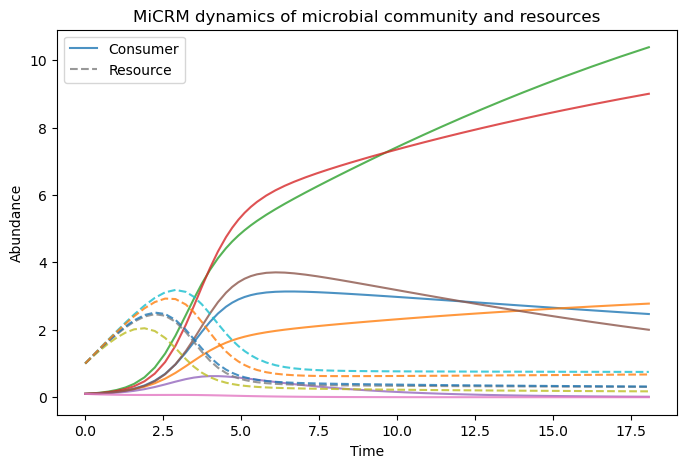

Number of survivors: 4
Consumer CUE at t=0: [ 0.34403487  0.4693242   0.56923147  0.45252575  0.10197765  0.25430875
 -1.07443695]
Effective LV α‐matrix:
 [[-0.03056679 -0.0082195  -0.00163252 -0.01286099 -0.0053004  -0.02186774
  -0.00929121]
 [-0.00799653 -0.00413386 -0.00103638 -0.00533615 -0.00236271 -0.00832056
  -0.00400179]
 [-0.00329185 -0.00229153  0.00022759 -0.00227239 -0.00094656 -0.00330566
  -0.00157638]
 [-0.01263316 -0.00533013 -0.0003778  -0.01019762 -0.00373826 -0.01224212
  -0.00660563]
 [-0.00672134 -0.00288284  0.00086437 -0.00474214 -0.00184658 -0.00647484
  -0.00322014]
 [-0.02366737 -0.00963307 -0.00225879 -0.01310281 -0.00603667 -0.02262733
  -0.01026683]
 [-0.00930604 -0.00412213 -0.00066249 -0.00697562 -0.00281742 -0.0095725
  -0.00489118]]
Effective LV growth rates r:
 [ 0.23688773  0.10823178  0.04019199  0.16663923 -0.25840038  0.19357228
 -0.50090681]


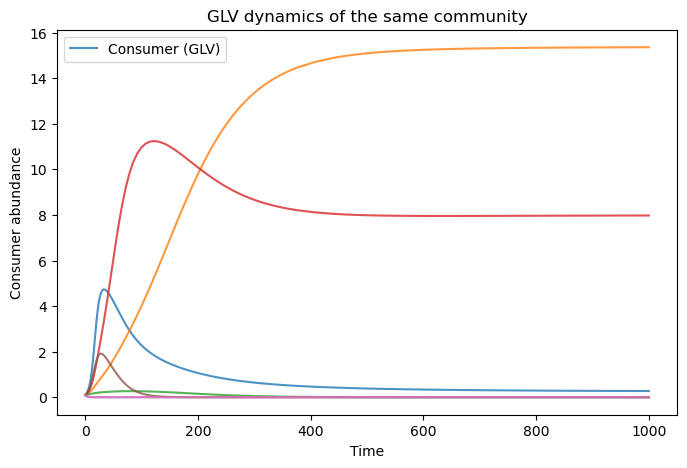

Leading eigenvalue: 0.009278615067577028


In [ ]:
# from github Temp_sim_demo.ipynb. this file includes the previous sim_frame.jl. 


import numpy as np
from numpy.random import default_rng
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from numpy.linalg import norm, eig

# ─────────────────────────────────────────────────────────────────────────────
# 1) Set up model dimensions, initial conditions, and temperature sweep params
# ─────────────────────────────────────────────────────────────────────────────
rng = default_rng(111)

N = 7
M = 5
L = np.full(N, 0.3) # leakage (this is not temp dependent, as per original MiCRM)

t0, t1 = 0.0, 2.5e10 # from 0 to a large value
tspan = (t0, t1) # time span for integration
x0 = np.concatenate([np.full(N, 0.1), np.full(M, 1)]) # initial conditions for consumers and resources

# Temperature‐dependence parameters
num_temps = 31 # number of temperatures
rho_t = np.array([0.0, 0.0])   # minimal trade‐off
Tr = 273.15 + 10 # reference temperature (10 °C)
Ed = 3.5 

# ─────────────────────────────────────────────────────────────────────────────
# 2) Define a “steady‐state” event for solve_ivp
#    Stops when ‖dx/dt‖ ≤ machine epsilon
# ─────────────────────────────────────────────────────────────────────────────
def mi_crm_rhs(t, x, p):
    return MiCRM_dxx(x, t, p) # MiCRM_dxx is the full RHS of the MiCRM ODE, defined before 

def ss_event(t, x, p): # steady state event 
    return norm(mi_crm_rhs(t, x, p)) - np.finfo(float).eps

ss_event.terminal = True
ss_event.direction = 0

# stops integration when system reaches steady state (machine epsilon), so it doesn't run forever

# ─────────────────────────────────────────────────────────────────────────────
# 3) Example simulation at 15 °C
# ─────────────────────────────────────────────────────────────────────────────

# generate model parameters 

T = 273.15 + 15
# seed is already set on rng, pass into generate_params if needed
p = generate_params(N, M,
                    f_u=F_u, f_m=F_m, f_rho=F_rho, f_omega=F_omega,
                    L=L, T=T, rho_t=rho_t, Tr=Tr, Ed=Ed)


# the generate_params function we defined before contain things like u, m, etc 
# here, we are actually using this function 
# within the generate_params function, e.g., we are defining f_u as the actual custom function F_u
# and other parameters like T are defined as the actual 'T' here, which we specified is 273.15 + 15


# Inspect parameter arrays
print("Uptake matrix u:\n", p['u']) # should be N x M sized matrix 
print("Mortality vector m:\n", p['m']) # should be a vector containing M elements 
print("Leakage tensor l shape:", p['l'].shape) # should be N x M x M array 

# ─────────────────────────────────────────────────────────────────────────────
# 4) Solve the full MiCRM ODE to (approx) steady state
# ─────────────────────────────────────────────────────────────────────────────
sol = solve_ivp(fun=lambda t, y: mi_crm_rhs(t, y, p),
                t_span=tspan, y0=x0,
                method='BDF',
                events=lambda t, y: ss_event(t, y, p),
                dense_output=False)

# collect trajectories (first 50 saved timepoints)
ts = sol.t[:50]
Y = sol.y[:, :50]
bm_dyn = Y[:N, :]       # consumer biomasses, for plotting later 
R_dyn  = Y[N:, :]       # resource abundances, for plotting later 

# ─────────────────────────────────────────────────────────────────────────────
# 5) Plot the first 50 timepoints
# ─────────────────────────────────────────────────────────────────────────────
plt.figure(figsize=(8,5))
for i in range(N):
    plt.plot(ts, bm_dyn[i], alpha=0.8, lw=1.5, label="_nolegend_" if i>0 else "Consumer")
for j in range(M):
    plt.plot(ts, R_dyn[j], alpha=0.8, lw=1.5, linestyle='--', label="_nolegend_" if j>0 else "Resource")
plt.xlabel("Time")
plt.ylabel("Abundance")
plt.title("MiCRM dynamics of microbial community and resources")
plt.legend()
plt.show()

# ─────────────────────────────────────────────────────────────────────────────
# 6) Extract equilibrium values
# ─────────────────────────────────────────────────────────────────────────────
bm_eq = sol.y[:N, -1] # equilibrium biomass 
# print("equilibrium biomass for consumers:", bm_eq)

R_eq  = sol.y[N:, -1] # equilibrium resource abundance 
# print("equilibrium resources:", R_eq) 

survivors = np.where(bm_eq > 1e-7)[0]   # indices of extant consumers. 1.0e-7 is a threshold for extinction
N_s = survivors.size
print("Number of survivors:", N_s) # number of survivors (equilibrium community richness)

# ─────────────────────────────────────────────────────────────────────────────
# 7) Compute species‐level CUE at initial resources x0[N:]
#    CUE_i = (u_i · R0 * (1-L_i) – m_i) / (u_i · R0)
# ─────────────────────────────────────────────────────────────────────────────
R0 = x0[N:]
cue = ( (p['u'] @ R0) * (1 - p['L']) - p['m'] ) / (p['u'] @ R0)
print("Consumer CUE at t=0:", cue) # carbon use efficiency at t=0 (initial resources)

# ─────────────────────────────────────────────────────────────────────────────
# 8) Derive and solve the effective GLV at the same initial condition
# ─────────────────────────────────────────────────────────────────────────────
p_lv = eff_LV_params(p, sol, verbose=False) # parameters for effective GLV

# p is the MiCRM parameters we generated before, sol is the solution from the MiCRM ODE
# p_lv is the effective GLV parameters, which are derived from the MiCRM parameters and the solution of the MiCRM ODE


print("Effective LV α‐matrix:\n", p_lv['alpha'])
print("Effective LV growth rates r:\n", p_lv['r'])

def glv_rhs(t, x):
    return LV_dx(x, t, p_lv) # LV_dx solves the LV equations, as defined before 

# Define resource‐only steady‐state event (stop when resources ≈ steady)
def glv_ss_event(t, x):
    # resource entries don't exist here—GLV only tracks consumers—so we skip this
    return 1.0  # no event
glv_ss_event.terminal = False

# Simulate GLV
x0_lv = sol.y[:p_lv['N'], 0] # initial conditions for consumers only (no resources). should be same as MiCRM initial conditions. 
sol_lv = solve_ivp(fun=lambda t, y: LV_dx(y, t, p_lv),
                   t_span=(0, 1e3),
                   y0=x0_lv,
                   method='BDF')


# note that in the GLV run, we are simulating the exact same community that was randomly drawn for the MiCRM ones
# e.g. the GLV parameters are generated based on 'sol' which are the results from MiCRM simulations 
# and then using those 'sol' results, we get things like equilibrium consumers and resources (Ceq, Req) 
# and these feed into the maths for generating parameters for the simplified GLV model 
# so yes we are making a fair comparison - not generating an entirely new random community in GLV 



# plot GLV

import matplotlib.pyplot as plt

# Extract timepoints and solution matrix for consumers
ts_lv = sol_lv.t         # 1D array of time values
Y_lv = sol_lv.y          # shape (N, len(ts_lv))

plt.figure(figsize=(8, 5))
for i in range(p_lv['N']):
    plt.plot(ts_lv, Y_lv[i], alpha=0.8, lw=1.5,
             label="_nolegend_" if i > 0 else "Consumer (GLV)") # no resource, only consumers 
plt.xlabel("Time")
plt.ylabel("Consumer abundance")
plt.title("GLV dynamics of the same community")
plt.legend()
plt.show()



# ─────────────────────────────────────────────────────────────────────────────
# 9) Compute the GLV Jacobian and its leading eigenvalue
# ─────────────────────────────────────────────────────────────────────────────
LV_jac = eff_LV_jac(p_lv, sol)
eigvals = eig(LV_jac)[0]
leading = eigvals[np.argmax(np.real(eigvals))] # eigenvalue with largest real part (dominant/leading eigenvalue) 
print("Leading eigenvalue:", leading)

# just looking at the eigenvalue with the largest real part. if positive, steady state is unstable. 


Uptake matrix structure u:
 [[0.20690088 0.13505386 0.04941046 0.35583037 0.25280444]
 [0.16568043 0.18897383 0.16356118 0.44995683 0.03182773]
 [0.05969841 0.23327693 0.16974664 0.29847012 0.23880791]
 [0.00317822 0.1245709  0.0852663  0.06625121 0.72073337]
 [0.29820941 0.0805812  0.21214605 0.02789354 0.3811698 ]
 [0.1849821  0.08010488 0.07675108 0.00664535 0.65151659]
 [0.26167677 0.13311988 0.07326232 0.09968202 0.432259  ]]
Mortality vector structure m:
 [1. 1. 1. 1. 1. 1. 1.]
Leakage tensor l shape: (7, 5, 5)


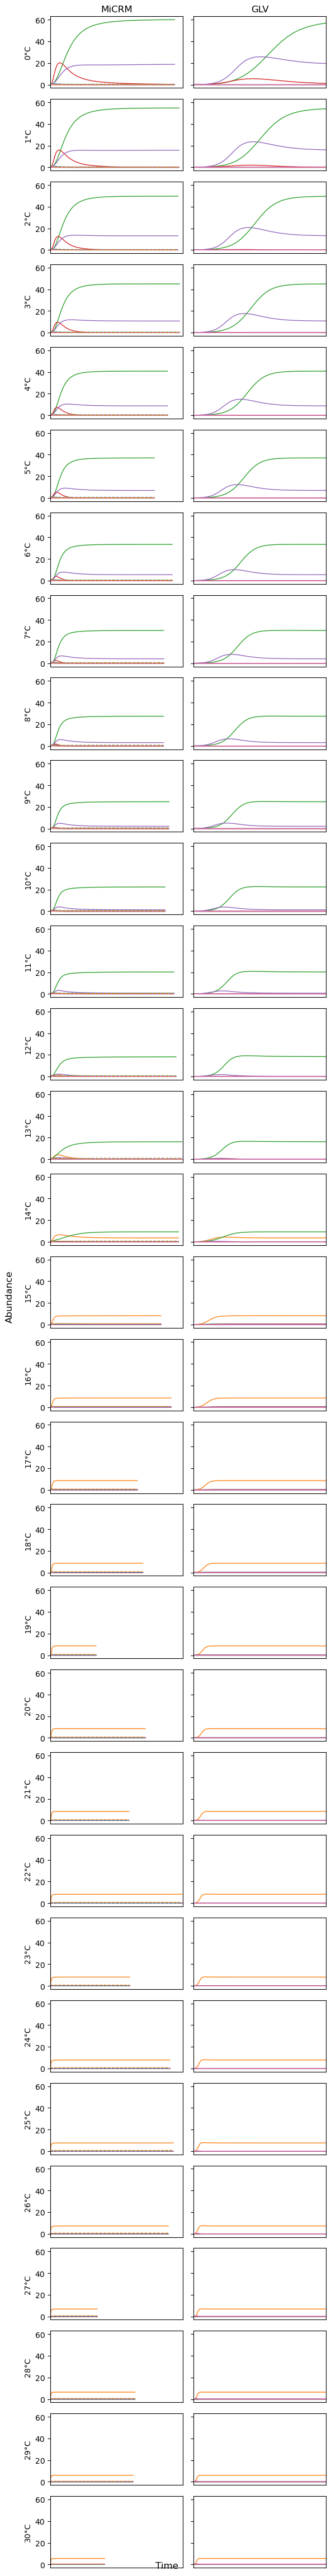

In [40]:
# test out different temperatures

import numpy as np
from numpy.random import default_rng
from scipy.integrate import solve_ivp
from numpy import linspace 
import matplotlib.pyplot as plt
from numpy.linalg import norm, eig


# want to first generate parameters for a particular randomly-assembled community
# and then simulate 31 different temperatures for this same community (both MiCRM and EGLV graphs for each temperature) 
# compare how temperature affects the deviation between MiCRM and EGLV graphs
# later can add in equation to quantitatively evaluate deviations, and print that for each temperature
# could also make graph for temperature vs species richness (number of surviving consumers)


rng = default_rng(111)

N = 7
M = 5
L = np.full(N, 0.3) # leakage (this is not temp dependent, as per original MiCRM)

t0, t1 = 0.0, 2.5e10 # from 0 to a large value
tspan = (t0, t1) # time span for integration
x0 = np.concatenate([np.full(N, 0.1), np.full(M, 1)]) # initial conditions for consumers and resources

# Temperature‐dependence parameters
num_temps = 31 # number of temperatures
rho_t = np.array([0.0, 0.0])   # minimal trade‐off
Tr = 273.15 + 10 # reference temperature (10 °C)
Ed = 3.5 

# ─────────────────────────────────────────────────────────────────────────────
# 2) Define a “steady‐state” event for solve_ivp
#    Stops when ‖dx/dt‖ ≤ machine epsilon
# ─────────────────────────────────────────────────────────────────────────────
def mi_crm_rhs(t, x, p):
    return MiCRM_dxx(x, t, p) # MiCRM_dxx is the full RHS of the MiCRM ODE, defined before 

def ss_event(t, x, p): # steady state event 
    return norm(mi_crm_rhs(t, x, p)) - np.finfo(float).eps

ss_event.terminal = True
ss_event.direction = 0

# stops integration when system reaches steady state (machine epsilon), so it doesn't run forever



####### TEST OUT DIFFERENT TEMPERATURES #######


structural = generate_params(
    N, M,
    f_u=def_u,      # relative preferences only
    f_m=def_m,      # placeholder
    f_rho=def_rho,
    f_omega=def_omega,
    f_l=def_l,
    # *no* T, Tr, Ed, rho_t here
    L=L,
    T=273.15,   # dummy (This satisfies temp_trait’s requirement that kw contain T, rho_t, Tr, Ed) 
    # since we are using the default def_u and def_m here, they ignore kw, so any T will work 
    # this whole thing will just provide relative preferences (u) and a constant m=1    
    rho_t=rho_t,  # dummy
    Tr=Tr,        # dummy
    Ed=Ed         # dummy
)

# the 'structural' parameters are static and don't change with temperature
# e.g. the def_u only generates relative preferences, not absolute ones
# however the uptake rate (u) will change with temperature. the relative preferences won't. 
# other things like rho and omega also don't change with temperature

# Inspect parameter arrays
print("Uptake matrix structure u:\n", structural['u']) # should be N x M sized matrix 
print("Mortality vector structure m:\n", structural['m']) # should be a vector containing M elements 
print("Leakage tensor l shape:", structural['l'].shape) # should be N x M x M array 




temp_vals = linspace(273.15, 273.15 + 30, num_temps) # 31 temperatures from 0 to 30 degrees C

results = [] # store results for each temperature. it is a list of dictionaries. each temp would produce its own dictionary. 

for T in temp_vals:

    # temp-dependent scalars

    temp_p_u = structural['B'][:,0]  * np.exp((-structural['E'][:,0]/k)*((1/T)-(1/Tr))) \
               /(1 + (structural['E'][:,0]/(Ed-structural['E'][:,0])) \
                    * np.exp(Ed/k*((1/structural['Tp'][:,0]) - (1/T))))
    temp_p_m = structural['B'][:,1]  * np.exp((-structural['E'][:,1]/k)*((1/T)-(1/Tr))) \
               /(1 + (structural['E'][:,1]/(Ed-structural['E'][:,1])) \
                    * np.exp(Ed/k*((1/structural['Tp'][:,1]) - (1/T))))
    

    # full parameter dictionary for this temp

    pT = {
        **structural,            # brings in u_pref, l, B, E, Tp, L, N, M, etc.
        'u': structural['u'] * temp_p_u[:,None],  # absolute uptake rates. the preference matrix from structural['u'] is multiplied (scaled) by the temperature-dependent uptake rates
        'm': temp_p_m,                            # mortality rates. the preference matrix from structural['m'] is multiplied (scaled) by the temperature-dependent mortality rates
        'lambda': np.sum(structural['l'], axis=2),
        'T': T
    }   
    
    # solve MiCRM at this temperature
    

    sol = solve_ivp(
    lambda t, y: MiCRM_dxx(y, t, pT),
    t_span=tspan,
    y0=x0,
    method='BDF'
    )

    
    # solve EGLV at this temperature

    
    p_lv = eff_LV_params(pT, sol, verbose=False)
    sol_lv = solve_ivp(lambda t,y: LV_dx(y,t,p_lv),
                       t_span=(0,1e3), y0=sol.y[:N,0], method='BDF')
    

    ##### store other interesting summary info #####

    # equilibrium values

    bm_eq = sol.y[:N, -1] # equilibrium consumer biomass 
    survivors = np.where(bm_eq > 1e-7)[0]   # indices of extant consumers. 1.0e-7 is a threshold for extinction
    N_s = survivors.size # number of survivors (equilibrium community richness)

    # leading eigenvalue

    LV_jac = eff_LV_jac(p_lv, sol)
    eigvals = eig(LV_jac)[0]
    leading = eigvals[np.argmax(np.real(eigvals))] # eigenvalue with largest real part (dominant/leading eigenvalue)    

    ##### store results as a dictionary ##### 

    results.append(dict(T=T, sol=sol, sol_lv=sol_lv, N_s=N_s, leading=leading))



# plot results as mini plots 
# it should show mini plots for 31 temperatures, each having MiCRM and EGLV side by side 

nT = num_temps
cols = 2
t_max = 1000

fig, axes = plt.subplots(nT, cols, figsize=(6, nT*1.5), sharex=True, sharey=True)

for idx, run in enumerate(results):
    T = run['T'] - 273.15

    # --- MiCRM panel ---
    sol = run['sol']
    ts = sol.t
    mask = ts <= t_max
    ts, Y = ts[mask], sol.y[:, mask]
    ax1 = axes[idx, 0]
    for i in range(N):
        ax1.plot(ts, Y[i], lw=1)
    for j in range(M):
        ax1.plot(ts, Y[N+j], '--', lw=1)
    ax1.set_xlim(0, t_max)
    if idx == 0:
        ax1.set_title("MiCRM")
    if idx < (nT - 1):
        ax1.set_xticks([])

    # --- GLV panel ---
    sol_lv = run['sol_lv']
    ts_lv = sol_lv.t
    mask_lv = ts_lv <= t_max
    ts_lv, Y_lv = ts_lv[mask_lv], sol_lv.y[:, mask_lv]
    ax2 = axes[idx, 1]
    for i in range(N):
        ax2.plot(ts_lv, Y_lv[i], lw=1)
    ax2.set_xlim(0, t_max)
    if idx == 0:
        ax2.set_title("GLV")
    if idx < (nT - 1):
        ax2.set_xticks([])

    # label the left of each row
    ax1.set_ylabel(f"{T:.0f}°C")

# shared labels
fig.supxlabel("Time")
fig.supylabel("Abundance")
plt.tight_layout()
plt.show()



